In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import font_manager

# 한글 글꼴 경로 설정
font_path = "C:\\Windows\\Fonts\\malgun.ttf"  # 예시로 맑은 고딕 사용, 실제 경로에 맞게 변경
font_prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

# 나머지 코드 실행
# 예: plt.plot(...), plt.show(), 등

In [53]:
df_main = pd.read_csv('./data/2023년_버스노선별_정류장별_시간대별_승하차_인원_정보(04월).csv', encoding = 'cp949')

C:\Users\user\AppData\Local\Temp\ipykernel_6792\2381497653.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_main = pd.read_csv('./data/2023년_버스노선별_정류장별_시간대별_승하차_인원_정보(04월).csv', encoding = 'cp949')


In [54]:
df_sub = pd.read_excel('./data/2. 동작구 정류장 파악 후 - 서울시버스정류소위치정보(20240110).xlsx')

In [55]:
df_sub = df_sub[df_sub['포함불포함'] == '포함']

In [126]:
df = df_main[df_main['표준버스정류장ID'].isin(df_sub['NODE_ID'])].reset_index()
df = df.drop(columns = 'index', axis = 1)

In [144]:
df = df.sort_values(by='버스정류장ARS번호', ascending=True)

In [145]:
columns = df.columns.to_list()[6:-3]

In [146]:
bus = df.groupby('버스정류장ARS번호')[columns].sum()

In [147]:
bus = bus.reset_index()

In [148]:
bus

,버스정류장ARS번호,00시승차총승객수,00시하차총승객수,1시승차총승객수,1시하차총승객수,2시승차총승객수,2시하차총승객수,3시승차총승객수,3시하차총승객수,4시승차총승객수,...,19시승차총승객수,19시하차총승객수,20시승차총승객수,20시하차총승객수,21시승차총승객수,21시하차총승객수,22시승차총승객수,22시하차총승객수,23시승차총승객수,23시하차총승객수
0,20001,101,77,12,6,2,3,4,4,375,...,1236,1922,874,1167,719,1187,547,830,322,391
1,20002,110,275,0,0,0,0,0,0,618,...,2147,4081,1662,2999,1854,2370,2230,1901,627,1160
2,20003,41,247,0,0,0,0,0,0,40,...,1541,2224,1028,1436,911,1444,1005,1307,310,922
3,20004,79,171,0,0,0,0,0,0,7,...,1451,1641,1162,1130,1063,1038,1268,801,444,431
4,20005,111,139,0,0,0,0,0,0,79,...,1464,2211,1006,1464,1037,1109,683,1023,349,514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,20988,0,0,0,0,0,0,0,0,0,...,37,20,20,20,15,10,11,10,0,0
251,20989,0,0,0,0,0,0,0,0,0,...,16,416,15,345,3,367,1,341,0,81
252,20992,4,1,0,0,0,0,0,0,0,...,171,39,96,18,95,13,87,14,57,5
253,20993,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [149]:
a = []
for i in df.iloc[df['버스정류장ARS번호'].drop_duplicates().index]['역명'].to_list():
    a.append(i)

In [150]:
bus['역명'] = a

In [151]:
bus[bus['버스정류장ARS번호'] == 20114]

,버스정류장ARS번호,00시승차총승객수,00시하차총승객수,1시승차총승객수,1시하차총승객수,2시승차총승객수,2시하차총승객수,3시승차총승객수,3시하차총승객수,4시승차총승객수,...,19시하차총승객수,20시승차총승객수,20시하차총승객수,21시승차총승객수,21시하차총승객수,22시승차총승객수,22시하차총승객수,23시승차총승객수,23시하차총승객수,역명
18,20114,332,325,94,92,59,68,102,49,276,...,6387,1941,4685,2073,4284,2033,3641,1171,1847,노량진역3번출구(00031)


In [152]:
columns = bus.columns.to_list()[1:-1]

In [155]:
bus.to_csv('4월동작구갑버스승하차인원_그룹바이이전_시간대별_수정완.csv', encoding = 'cp949')

In [156]:
bus

,버스정류장ARS번호,00시승차총승객수,00시하차총승객수,1시승차총승객수,1시하차총승객수,2시승차총승객수,2시하차총승객수,3시승차총승객수,3시하차총승객수,4시승차총승객수,...,19시하차총승객수,20시승차총승객수,20시하차총승객수,21시승차총승객수,21시하차총승객수,22시승차총승객수,22시하차총승객수,23시승차총승객수,23시하차총승객수,역명
0,20001,101,77,12,6,2,3,4,4,375,...,1922,874,1167,719,1187,547,830,322,391,동작상떼빌아파트(00060)
1,20002,110,275,0,0,0,0,0,0,618,...,4081,1662,2999,1854,2370,2230,1901,627,1160,신대방경남아파트(00061)
2,20003,41,247,0,0,0,0,0,0,40,...,2224,1028,1436,911,1444,1005,1307,310,922,신대방현대아파트(00020)
3,20004,79,171,0,0,0,0,0,0,7,...,1641,1162,1130,1063,1038,1268,801,444,431,보라매역.동작세무서(00022)
4,20005,111,139,0,0,0,0,0,0,79,...,2211,1006,1464,1037,1109,683,1023,349,514,보라매역.동작세무서(00049)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,20988,0,0,0,0,0,0,0,0,0,...,20,20,20,15,10,11,10,0,0,제일성민교회(00023)
251,20989,0,0,0,0,0,0,0,0,0,...,416,15,345,3,367,1,341,0,81,동아아파트(00025)
252,20992,4,1,0,0,0,0,0,0,0,...,39,96,18,95,13,87,14,57,5,당곡중.고등학교(00020)
253,20993,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,벽산아파트(00035)


In [157]:
# 각 컬럼에 대해 결과를 저장할 변수들을 담은 딕셔너리
result_dict = {}

# 각 컬럼에 대해 반복하여 결과를 저장
for i in columns:
    result_dict[i] = bus[[i, '역명', '버스정류장ARS번호']].nlargest(10, i)

# # 결과 확인
# for key, value in result_dict.items():
#     print(f"Results for {key}:")
#     print(value)
#     print("\n")

In [158]:
list(result_dict.values())[0].reset_index().drop(columns = 'index')

,00시승차총승객수,역명,버스정류장ARS번호
0,1488,노량진수산시장.CTS기독교TV(00057),20010
1,1170,노량진역2번출구(00054),20115
2,546,노량진역(00065),20012
3,523,노량진역(00098),20011
4,462,7호선장승배기역.상도2치안센터(00028),20197
5,388,동작구청.노량진초등학교앞(00062),20190
6,348,신대방삼거리(00022),20186
7,341,노량진수산시장.CTS기독교TV(00086),20009
8,338,청화병원(00081),20193
9,332,노량진역3번출구(00031),20114


In [159]:
list(result_dict.values())[1].reset_index().drop(columns = 'index')

,00시하차총승객수,역명,버스정류장ARS번호
0,1100,노량진수산시장.CTS기독교TV(00057),20010
1,626,노량진수산시장.CTS기독교TV(00025),20008
2,615,서울지방병무청앞(00021),20014
3,554,보라매병원입구(00047),20187
4,503,노량진역(00065),20012
5,437,상도2동아이파크.포스코더샵아파트(00033),20199
6,411,상도터널노량진동(00016),20155
7,399,청화병원(00081),20193
8,396,동작구청정문(00054),20228
9,395,노량진수산시장.CTS기독교TV(00086),20009


In [160]:
list(result_dict.values())[2].reset_index().drop(columns = 'index')

,1시승차총승객수,역명,버스정류장ARS번호
0,339,동작구청정문(00018),20240
1,188,노량진수산시장.CTS기독교TV(00057),20010
2,137,청화병원(00081),20193
3,120,청화병원(00043),20192
4,111,노량진역(00098),20011
5,110,신대방삼거리(00022),20186
6,102,노량진역(00065),20012
7,94,노량진역3번출구(00031),20114
8,93,동작문화복지센터.동작보건소(00048),20151
9,92,상도초등학교입구(00088),20148


In [161]:
list(result_dict.values())[3].reset_index().drop(columns = 'index')

,1시하차총승객수,역명,버스정류장ARS번호
0,462,동작구청정문(00018),20240
1,375,서울지방병무청앞(00021),20014
2,348,노량진역(00065),20012
3,217,상도초등학교입구(00129),20150
4,215,성대시장(00066),20147
5,200,청화병원(00081),20193
6,190,동작문화복지센터.동작보건소(00048),20151
7,171,청화병원(00043),20192
8,148,상도터널노량진동(00016),20155
9,146,신대방삼거리(00022),20186


In [162]:
list(result_dict.values())[4].reset_index().drop(columns = 'index')

,2시승차총승객수,역명,버스정류장ARS번호
0,189,동작구청정문(00018),20240
1,127,노량진수산시장.CTS기독교TV(00057),20010
2,109,청화병원(00081),20193
3,94,노량진역(00098),20011
4,79,청화병원(00043),20192
5,71,노량진역(00065),20012
6,68,상도초등학교입구(00088),20148
7,67,장성교회(00125),20191
8,60,신대방삼거리(00022),20186
9,59,노량진역3번출구(00031),20114


In [163]:
list(result_dict.values())[5].reset_index().drop(columns = 'index')

,2시하차총승객수,역명,버스정류장ARS번호
0,370,동작구청정문(00018),20240
1,148,노량진역(00065),20012
2,132,서울지방병무청앞(00021),20014
3,125,보라매병원입구(00047),20187
4,124,청화병원(00081),20193
5,123,성대시장(00066),20147
6,117,동작문화복지센터.동작보건소(00048),20151
7,111,청화병원(00043),20192
8,106,상도초등학교입구(00129),20150
9,101,노량진수산시장.CTS기독교TV(00057),20010


In [164]:
list(result_dict.values())[6].reset_index().drop(columns = 'index')

,3시승차총승객수,역명,버스정류장ARS번호
0,147,동작구청정문(00018),20240
1,102,노량진역3번출구(00031),20114
2,89,노량진수산시장.CTS기독교TV(00057),20010
3,67,성대시장(00066),20147
4,67,신대방삼거리(00022),20186
5,65,청화병원(00081),20193
6,60,동작문화복지센터.동작보건소(00048),20151
7,60,동작구청.노량진초등학교앞(00062),20190
8,58,보라매병원입구(00047),20187
9,42,상도터널노량진동(00016),20155


In [165]:
list(result_dict.values())[7].reset_index().drop(columns = 'index')

,3시하차총승객수,역명,버스정류장ARS번호
0,208,동작구청정문(00018),20240
1,114,청화병원(00081),20193
2,99,보라매병원입구(00047),20187
3,97,보라매병원입구(00031),20188
4,96,서울지방병무청앞(00021),20014
5,94,노량진역(00065),20012
6,91,성대시장(00066),20147
7,91,신대방삼거리(00022),20186
8,83,상도초등학교입구(00129),20150
9,74,동작문화복지센터.동작보건소(00048),20151


In [166]:
list(result_dict.values())[8].reset_index().drop(columns = 'index')

,4시승차총승객수,역명,버스정류장ARS번호
0,1108,노들역(00045),20013
1,1104,상도초등학교입구(00088),20148
2,927,보라매병원입구(00047),20187
3,679,상도초등학교입구(00058),20149
4,647,동작문화복지센터.동작보건소(00021),20152
5,618,신대방경남아파트(00061),20002
6,595,현대아파트(00016),20007
7,477,노량진역(00098),20011
8,469,청화병원(00043),20192
9,416,상도4동약수맨션(00025),20220


In [167]:
list(result_dict.values())[9].reset_index().drop(columns = 'index')

,4시하차총승객수,역명,버스정류장ARS번호
0,1390,노량진역3번출구(00031),20114
1,645,장성교회(00125),20191
2,611,현대아파트(00016),20007
3,429,노들역(00045),20013
4,366,청화병원(00081),20193
5,365,동작상떼빌아파트(00060),20001
6,348,노량진수산시장.CTS기독교TV(00086),20009
7,313,동작구청정문(00018),20240
8,273,노량진역(00098),20011
9,263,상도초등학교입구(00058),20149


In [168]:
list(result_dict.values())[10].reset_index().drop(columns = 'index')

,5시승차총승객수,역명,버스정류장ARS번호
0,2790,상도초등학교입구(00088),20148
1,2557,노들역(00045),20013
2,1884,신대방경남아파트(00061),20002
3,1798,상도초등학교입구(00058),20149
4,1710,상도4동약수맨션(00025),20220
5,1536,보라매병원입구(00047),20187
6,1417,현대아파트(00016),20007
7,1284,성대시장(00066),20147
8,1159,청화병원(00081),20193
9,1018,공군호텔(00065),20107


In [169]:
list(result_dict.values())[11].reset_index().drop(columns = 'index')

,5시하차총승객수,역명,버스정류장ARS번호
0,7734,노량진역3번출구(00031),20114
1,2308,장성교회(00125),20191
2,2190,노량진수산시장.CTS기독교TV(00086),20009
3,1674,현대아파트(00016),20007
4,1466,공군호텔(00065),20107
5,1163,노들역(00045),20013
6,952,노량진수산시장.CTS기독교TV(00057),20010
7,885,서울지방병무청앞(00021),20014
8,872,서울지방병무청앞(00056),20106
9,867,보라매역.동작세무서(00049),20005


In [170]:
list(result_dict.values())[12].reset_index().drop(columns = 'index')

,6시승차총승객수,역명,버스정류장ARS번호
0,3905,상도초등학교입구(00088),20148
1,3293,상도4동약수맨션(00025),20220
2,3282,공군호텔(00065),20107
3,2899,신대방현대아파트(00020),20003
4,2619,청화병원(00081),20193
5,2555,보라매병원입구(00047),20187
6,2476,상도초등학교입구(00058),20149
7,2455,강남중학교(00050),20006
8,2410,현대아파트(00016),20007
9,2202,노들역(00045),20013


In [171]:
list(result_dict.values())[13].reset_index().drop(columns = 'index')

,6시하차총승객수,역명,버스정류장ARS번호
0,10853,노량진역3번출구(00031),20114
1,3554,주택가(00022),20837
2,3465,노량진수산시장.CTS기독교TV(00086),20009
3,2862,장성교회(00125),20191
4,2232,노량진수산시장.CTS기독교TV(00057),20010
5,2200,공군호텔(00065),20107
6,2045,현대아파트(00016),20007
7,1750,KT동작지사(00023),20108
8,1627,보라매병원입구(00047),20187
9,1553,신대방경남아파트(00061),20002


In [172]:
list(result_dict.values())[14].reset_index().drop(columns = 'index')

,7시승차총승객수,역명,버스정류장ARS번호
0,9237,상도초등학교입구(00088),20148
1,7695,신대방현대아파트(00020),20003
2,7358,공군호텔(00065),20107
3,6772,상도4동약수맨션(00025),20220
4,6533,보라매병원입구(00047),20187
5,6195,강남중학교(00050),20006
6,5192,현대아파트(00016),20007
7,5101,청화병원(00081),20193
8,4940,상도초등학교입구(00058),20149
9,4894,성대시장(00066),20147


In [173]:
list(result_dict.values())[15].reset_index().drop(columns = 'index')

,7시하차총승객수,역명,버스정류장ARS번호
0,26896,노량진역3번출구(00031),20114
1,9560,주택가(00022),20837
2,8517,장성교회(00125),20191
3,8364,노량진수산시장.CTS기독교TV(00086),20009
4,5909,노량진수산시장.CTS기독교TV(00057),20010
5,4825,KT동작지사(00023),20108
6,4734,현대아파트(00016),20007
7,3823,공군호텔(00065),20107
8,3583,보라매역.동작세무서(00049),20005
9,3245,보라매병원입구(00047),20187


In [174]:
list(result_dict.values())[16].reset_index().drop(columns = 'index')

,8시승차총승객수,역명,버스정류장ARS번호
0,11400,상도초등학교입구(00088),20148
1,7984,상도4동약수맨션(00025),20220
2,7966,공군호텔(00065),20107
3,7202,청화병원(00081),20193
4,7154,신대방현대아파트(00020),20003
5,6982,상도초등학교입구(00058),20149
6,6961,보라매병원입구(00047),20187
7,6668,현대아파트(00016),20007
8,5927,강남중학교(00050),20006
9,5584,성대시장(00066),20147


In [175]:
list(result_dict.values())[17].reset_index().drop(columns = 'index')

,8시하차총승객수,역명,버스정류장ARS번호
0,37939,노량진역3번출구(00031),20114
1,11793,장성교회(00125),20191
2,11229,주택가(00022),20837
3,10448,노량진수산시장.CTS기독교TV(00086),20009
4,6755,신대방경남아파트(00061),20002
5,6509,노량진수산시장.CTS기독교TV(00057),20010
6,6417,보라매병원입구(00047),20187
7,5955,KT동작지사(00023),20108
8,5642,현대아파트(00016),20007
9,5579,보라매역.동작세무서(00049),20005


In [176]:
list(result_dict.values())[18].reset_index().drop(columns = 'index')

,9시승차총승객수,역명,버스정류장ARS번호
0,7687,상도초등학교입구(00088),20148
1,7090,공군호텔(00065),20107
2,5786,상도4동약수맨션(00025),20220
3,4986,청화병원(00081),20193
4,4875,현대아파트(00016),20007
5,4615,신대방현대아파트(00020),20003
6,4602,강남중학교(00050),20006
7,4539,상도초등학교입구(00058),20149
8,4491,보라매병원입구(00047),20187
9,4381,성대시장(00066),20147


In [177]:
list(result_dict.values())[19].reset_index().drop(columns = 'index')

,9시하차총승객수,역명,버스정류장ARS번호
0,21859,노량진역3번출구(00031),20114
1,6819,노량진수산시장.CTS기독교TV(00086),20009
2,6612,주택가(00022),20837
3,5207,장성교회(00125),20191
4,4870,신대방경남아파트(00061),20002
5,4303,노량진수산시장.CTS기독교TV(00057),20010
6,4042,보라매병원입구(00047),20187
7,4028,상도터널상도동(00030),20158
8,3958,KT동작지사(00023),20108
9,3957,공군호텔(00065),20107


In [178]:
list(result_dict.values())[20].reset_index().drop(columns = 'index')

,10시승차총승객수,역명,버스정류장ARS번호
0,5600,상도초등학교입구(00088),20148
1,4909,공군호텔(00065),20107
2,4373,상도4동약수맨션(00025),20220
3,3833,신대방경남아파트(00061),20002
4,3785,현대아파트(00016),20007
5,3618,노량진수산시장.CTS기독교TV(00057),20010
6,3461,도시가스.두산아파트(00014),20867
7,3431,신대방현대아파트(00020),20003
8,3410,강남중학교(00050),20006
9,3363,청화병원(00081),20193


In [179]:
list(result_dict.values())[21].reset_index().drop(columns = 'index')

,10시하차총승객수,역명,버스정류장ARS번호
0,12064,노량진역3번출구(00031),20114
1,4524,주택가(00022),20837
2,4440,신대방경남아파트(00061),20002
3,4310,노량진수산시장.CTS기독교TV(00086),20009
4,4143,상도터널상도동(00030),20158
5,3507,노량진수산시장.CTS기독교TV(00057),20010
6,3331,장성교회(00125),20191
7,3085,보라매병원입구(00047),20187
8,2924,현대아파트(00016),20007
9,2782,KT동작지사(00023),20108


In [180]:
list(result_dict.values())[22].reset_index().drop(columns = 'index')

,11시승차총승객수,역명,버스정류장ARS번호
0,4855,상도초등학교입구(00088),20148
1,4706,공군호텔(00065),20107
2,3977,신대방경남아파트(00061),20002
3,3849,노량진수산시장.CTS기독교TV(00057),20010
4,3558,현대아파트(00016),20007
5,3522,상도4동약수맨션(00025),20220
6,3520,도시가스.두산아파트(00014),20867
7,3348,노량진역2번출구(00054),20115
8,3087,청화병원(00081),20193
9,3035,성대시장(00066),20147


In [181]:
list(result_dict.values())[23].reset_index().drop(columns = 'index')

,11시하차총승객수,역명,버스정류장ARS번호
0,10549,노량진역3번출구(00031),20114
1,4040,주택가(00022),20837
2,3641,노량진수산시장.CTS기독교TV(00086),20009
3,3640,상도터널상도동(00030),20158
4,3288,노량진수산시장.CTS기독교TV(00057),20010
5,2911,보라매병원입구(00047),20187
6,2838,장성교회(00125),20191
7,2745,현대아파트(00016),20007
8,2683,신대방경남아파트(00061),20002
9,2599,청화병원(00081),20193


In [182]:
list(result_dict.values())[24].reset_index().drop(columns = 'index')

,12시승차총승객수,역명,버스정류장ARS번호
0,5281,상도초등학교입구(00088),20148
1,4569,공군호텔(00065),20107
2,4437,노량진수산시장.CTS기독교TV(00057),20010
3,4160,신대방경남아파트(00061),20002
4,3832,노량진역2번출구(00054),20115
5,3764,상도4동약수맨션(00025),20220
6,3613,현대아파트(00016),20007
7,3466,도시가스.두산아파트(00014),20867
8,3269,강남중학교(00050),20006
9,3261,청화병원(00081),20193


In [183]:
list(result_dict.values())[25].reset_index().drop(columns = 'index')

,12시하차총승객수,역명,버스정류장ARS번호
0,11333,노량진역3번출구(00031),20114
1,4308,주택가(00022),20837
2,3865,노량진수산시장.CTS기독교TV(00086),20009
3,3466,노량진수산시장.CTS기독교TV(00057),20010
4,3421,상도터널상도동(00030),20158
5,3077,보라매병원입구(00047),20187
6,2992,장성교회(00125),20191
7,2970,현대아파트(00016),20007
8,2517,KT동작지사(00023),20108
9,2429,신대방경남아파트(00061),20002


In [184]:
list(result_dict.values())[26].reset_index().drop(columns = 'index')

,13시승차총승객수,역명,버스정류장ARS번호
0,4965,노량진수산시장.CTS기독교TV(00057),20010
1,4844,상도초등학교입구(00088),20148
2,4819,노량진역2번출구(00054),20115
3,4154,공군호텔(00065),20107
4,3579,현대아파트(00016),20007
5,3573,신대방경남아파트(00061),20002
6,3539,도시가스.두산아파트(00014),20867
7,3409,성대시장(00066),20147
8,3347,상도4동약수맨션(00025),20220
9,3313,청화병원(00081),20193


In [185]:
list(result_dict.values())[27].reset_index().drop(columns = 'index')

,13시하차총승객수,역명,버스정류장ARS번호
0,11135,노량진역3번출구(00031),20114
1,4008,신대방경남아파트(00061),20002
2,3982,노량진수산시장.CTS기독교TV(00057),20010
3,3934,주택가(00022),20837
4,3469,노량진수산시장.CTS기독교TV(00086),20009
5,3425,상도터널상도동(00030),20158
6,3203,보라매병원입구(00047),20187
7,2880,장성교회(00125),20191
8,2666,노량진역(00065),20012
9,2652,청화병원(00081),20193


In [186]:
list(result_dict.values())[28].reset_index().drop(columns = 'index')

,14시승차총승객수,역명,버스정류장ARS번호
0,5525,노량진역2번출구(00054),20115
1,5515,노량진수산시장.CTS기독교TV(00057),20010
2,4404,상도초등학교입구(00088),20148
3,4149,도시가스.두산아파트(00014),20867
4,3904,공군호텔(00065),20107
5,3419,신대방경남아파트(00061),20002
6,3384,현대아파트(00016),20007
7,3307,상도터널상도동(00015),20159
8,3100,성대시장(00066),20147
9,3049,노량진역(00098),20011


In [187]:
list(result_dict.values())[29].reset_index().drop(columns = 'index')

,14시하차총승객수,역명,버스정류장ARS번호
0,9017,노량진역3번출구(00031),20114
1,3795,노량진수산시장.CTS기독교TV(00057),20010
2,3785,상도터널상도동(00030),20158
3,3711,주택가(00022),20837
4,3449,노량진수산시장.CTS기독교TV(00086),20009
5,3368,보라매병원입구(00047),20187
6,3068,성대시장(00066),20147
7,2942,상도초등학교입구(00088),20148
8,2917,신대방경남아파트(00061),20002
9,2804,현대아파트(00016),20007


In [188]:
list(result_dict.values())[30].reset_index().drop(columns = 'index')

,15시승차총승객수,역명,버스정류장ARS번호
0,6575,노량진역2번출구(00054),20115
1,5983,노량진수산시장.CTS기독교TV(00057),20010
2,4099,상도초등학교입구(00088),20148
3,3846,도시가스.두산아파트(00014),20867
4,3779,신대방경남아파트(00061),20002
5,3760,공군호텔(00065),20107
6,3562,노량진역(00098),20011
7,3438,상도터널상도동(00015),20159
8,3323,노량진수산시장.CTS기독교TV(00086),20009
9,3221,현대아파트(00016),20007


In [189]:
list(result_dict.values())[31].reset_index().drop(columns = 'index')

,15시하차총승객수,역명,버스정류장ARS번호
0,8453,노량진역3번출구(00031),20114
1,4376,노량진수산시장.CTS기독교TV(00057),20010
2,3836,성대시장(00066),20147
3,3807,주택가(00022),20837
4,3712,상도터널상도동(00030),20158
5,3670,보라매병원입구(00047),20187
6,3472,상도초등학교입구(00088),20148
7,3406,노량진수산시장.CTS기독교TV(00086),20009
8,2985,서울지방병무청앞(00021),20014
9,2872,노량진역(00065),20012


In [190]:
list(result_dict.values())[32].reset_index().drop(columns = 'index')

,16시승차총승객수,역명,버스정류장ARS번호
0,8512,노량진역2번출구(00054),20115
1,7232,노량진수산시장.CTS기독교TV(00057),20010
2,5131,현대아파트(00016),20007
3,4482,보라매역.동작세무서(00022),20004
4,4476,도시가스.두산아파트(00014),20867
5,4234,신대방경남아파트(00061),20002
6,4215,공군호텔(00065),20107
7,4160,상도초등학교입구(00088),20148
8,4013,노량진역(00098),20011
9,3843,노량진수산시장.CTS기독교TV(00086),20009


In [191]:
list(result_dict.values())[33].reset_index().drop(columns = 'index')

,16시하차총승객수,역명,버스정류장ARS번호
0,9801,노량진역3번출구(00031),20114
1,4764,노량진수산시장.CTS기독교TV(00057),20010
2,4716,보라매병원입구(00047),20187
3,4474,노량진수산시장.CTS기독교TV(00086),20009
4,4366,상도터널상도동(00030),20158
5,4323,성대시장(00066),20147
6,4100,상도초등학교입구(00088),20148
7,3727,주택가(00022),20837
8,3434,서울지방병무청앞(00021),20014
9,3419,현대아파트(00016),20007


In [192]:
list(result_dict.values())[34].reset_index().drop(columns = 'index')

,17시승차총승객수,역명,버스정류장ARS번호
0,13108,노량진역2번출구(00054),20115
1,9424,노량진수산시장.CTS기독교TV(00057),20010
2,6740,도시가스.두산아파트(00014),20867
3,4916,노량진역(00098),20011
4,4884,신대방경남아파트(00061),20002
5,4857,현대아파트(00016),20007
6,4452,공군호텔(00065),20107
7,4270,상도터널상도동(00015),20159
8,4147,상도초등학교입구(00088),20148
9,3981,동작구청정문(00018),20240


In [193]:
list(result_dict.values())[35].reset_index().drop(columns = 'index')

,17시하차총승객수,역명,버스정류장ARS번호
0,10198,노량진역3번출구(00031),20114
1,5510,성대시장(00066),20147
2,5245,노량진수산시장.CTS기독교TV(00057),20010
3,4809,보라매병원입구(00047),20187
4,4752,노량진수산시장.CTS기독교TV(00086),20009
5,4406,상도초등학교입구(00088),20148
6,4356,상도터널상도동(00030),20158
7,4018,현대아파트(00016),20007
8,4007,주택가(00022),20837
9,3985,서울지방병무청앞(00021),20014


In [194]:
list(result_dict.values())[36].reset_index().drop(columns = 'index')

,18시승차총승객수,역명,버스정류장ARS번호
0,20350,노량진역2번출구(00054),20115
1,11522,노량진수산시장.CTS기독교TV(00057),20010
2,8574,도시가스.두산아파트(00014),20867
3,6398,동작구청정문(00018),20240
4,6336,노량진역(00098),20011
5,5243,신대방삼거리(00022),20186
6,5157,동작구청.노량진초등학교앞(00062),20190
7,5124,노량진수산시장.CTS기독교TV(00086),20009
8,5117,현대아파트(00016),20007
9,4317,노량진역(00065),20012


In [195]:
list(result_dict.values())[37].reset_index().drop(columns = 'index')

,18시하차총승객수,역명,버스정류장ARS번호
0,10284,노량진역3번출구(00031),20114
1,7776,성대시장(00066),20147
2,5658,보라매병원입구(00047),20187
3,5641,노량진수산시장.CTS기독교TV(00057),20010
4,5286,상도초등학교입구(00088),20148
5,4924,서울지방병무청앞(00021),20014
6,4905,신대방경남아파트(00061),20002
7,4835,상도초등학교입구(00129),20150
8,4799,대림초등학교(00024),20145
9,4766,현대아파트(00012),20891


In [196]:
list(result_dict.values())[38].reset_index().drop(columns = 'index')

,19시승차총승객수,역명,버스정류장ARS번호
0,14665,노량진역2번출구(00054),20115
1,9845,노량진수산시장.CTS기독교TV(00057),20010
2,7434,도시가스.두산아파트(00014),20867
3,5119,노량진역(00098),20011
4,4478,동작구청정문(00018),20240
5,4097,신대방삼거리(00022),20186
6,3852,7호선장승배기역.상도2치안센터(00028),20197
7,3747,노량진역(00065),20012
8,3612,노량진수산시장.CTS기독교TV(00086),20009
9,3406,동작구청.노량진초등학교앞(00062),20190


In [197]:
list(result_dict.values())[39].reset_index().drop(columns = 'index')

,19시하차총승객수,역명,버스정류장ARS번호
0,6826,성대시장(00066),20147
1,6387,노량진역3번출구(00031),20114
2,4627,상도초등학교입구(00088),20148
3,4517,현대아파트(00012),20891
4,4445,노량진수산시장.CTS기독교TV(00057),20010
5,4369,보라매병원입구(00047),20187
6,4137,신대방삼거리(00022),20186
7,4135,상도초등학교입구(00129),20150
8,4081,신대방경남아파트(00061),20002
9,4042,상도터널상도동(00030),20158


In [198]:
list(result_dict.values())[40].reset_index().drop(columns = 'index')

,20시승차총승객수,역명,버스정류장ARS번호
0,11048,노량진역2번출구(00054),20115
1,7595,노량진수산시장.CTS기독교TV(00057),20010
2,5310,도시가스.두산아파트(00014),20867
3,4130,노량진역(00098),20011
4,3529,노량진역(00065),20012
5,3488,신대방삼거리(00022),20186
6,3056,동작구청정문(00018),20240
7,2785,동작구청.노량진초등학교앞(00062),20190
8,2781,7호선장승배기역.상도2치안센터(00028),20197
9,2771,노량진수산시장.CTS기독교TV(00086),20009


In [199]:
list(result_dict.values())[41].reset_index().drop(columns = 'index')

,20시하차총승객수,역명,버스정류장ARS번호
0,4685,노량진역3번출구(00031),20114
1,4674,성대시장(00066),20147
2,3762,노량진수산시장.CTS기독교TV(00057),20010
3,3759,상도초등학교입구(00088),20148
4,3750,보라매병원입구(00047),20187
5,3617,상도터널상도동(00030),20158
6,3236,현대아파트(00012),20891
7,3190,신대방삼거리(00022),20186
8,2999,신대방경남아파트(00061),20002
9,2925,상도초등학교입구(00129),20150


In [200]:
list(result_dict.values())[42].reset_index().drop(columns = 'index')

,21시승차총승객수,역명,버스정류장ARS번호
0,11526,노량진역2번출구(00054),20115
1,8798,노량진수산시장.CTS기독교TV(00057),20010
2,5918,도시가스.두산아파트(00014),20867
3,4393,노량진역(00098),20011
4,3821,노량진역(00065),20012
5,3238,동작구청정문(00018),20240
6,2994,신대방삼거리(00022),20186
7,2945,노량진수산시장.CTS기독교TV(00086),20009
8,2865,동작구청.노량진초등학교앞(00062),20190
9,2607,7호선장승배기역.상도2치안센터(00028),20197


In [201]:
list(result_dict.values())[43].reset_index().drop(columns = 'index')

,21시하차총승객수,역명,버스정류장ARS번호
0,4340,성대시장(00066),20147
1,4284,노량진역3번출구(00031),20114
2,3821,상도터널상도동(00030),20158
3,3612,노량진수산시장.CTS기독교TV(00057),20010
4,3575,상도초등학교입구(00088),20148
5,3175,신대방삼거리(00022),20186
6,3086,보라매병원입구(00047),20187
7,2874,서울지방병무청앞(00021),20014
8,2778,상도초등학교입구(00129),20150
9,2745,현대아파트(00012),20891


In [202]:
list(result_dict.values())[44].reset_index().drop(columns = 'index')

,22시승차총승객수,역명,버스정류장ARS번호
0,10745,노량진역2번출구(00054),20115
1,9981,노량진수산시장.CTS기독교TV(00057),20010
2,5969,도시가스.두산아파트(00014),20867
3,4117,노량진역(00065),20012
4,4049,노량진역(00098),20011
5,3553,동작구청.노량진초등학교앞(00062),20190
6,3436,노량진수산시장.CTS기독교TV(00086),20009
7,3302,동작구청정문(00018),20240
8,2546,신대방삼거리(00022),20186
9,2514,7호선장승배기역.상도2치안센터(00028),20197


In [203]:
list(result_dict.values())[45].reset_index().drop(columns = 'index')

,22시하차총승객수,역명,버스정류장ARS번호
0,4374,성대시장(00066),20147
1,4055,상도터널상도동(00030),20158
2,3641,노량진역3번출구(00031),20114
3,3526,노량진수산시장.CTS기독교TV(00057),20010
4,3408,상도초등학교입구(00088),20148
5,3034,신대방삼거리(00022),20186
6,3001,보라매병원입구(00047),20187
7,2836,상도초등학교입구(00129),20150
8,2710,서울지방병무청앞(00021),20014
9,2567,현대아파트(00012),20891


In [204]:
list(result_dict.values())[46].reset_index().drop(columns = 'index')

,23시승차총승객수,역명,버스정류장ARS번호
0,6799,노량진역2번출구(00054),20115
1,4704,노량진수산시장.CTS기독교TV(00057),20010
2,3751,도시가스.두산아파트(00014),20867
3,2685,노량진역(00098),20011
4,2158,동작구청.노량진초등학교앞(00062),20190
5,1977,노량진역(00065),20012
6,1719,7호선장승배기역.상도2치안센터(00028),20197
7,1515,노량진수산시장.CTS기독교TV(00086),20009
8,1443,신대방삼거리(00022),20186
9,1258,동작실버센터입구(00058),20248


In [205]:
list(result_dict.values())[47].reset_index().drop(columns = 'index')

,23시하차총승객수,역명,버스정류장ARS번호
0,2622,상도터널상도동(00030),20158
1,2503,성대시장(00066),20147
2,2383,노량진수산시장.CTS기독교TV(00057),20010
3,1861,상도초등학교입구(00088),20148
4,1847,노량진역3번출구(00031),20114
5,1767,보라매병원입구(00047),20187
6,1663,상도초등학교입구(00129),20150
7,1637,신대방삼거리(00022),20186
8,1600,상도2동아이파크.포스코더샵아파트(00033),20199
9,1543,현대아파트(00012),20891


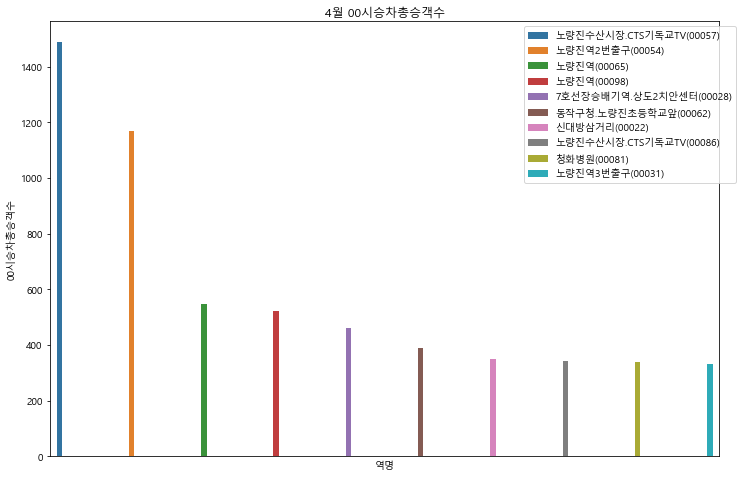

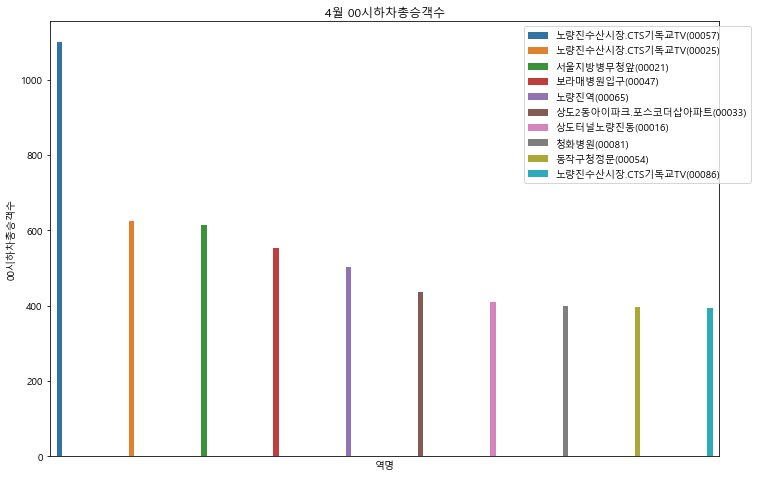

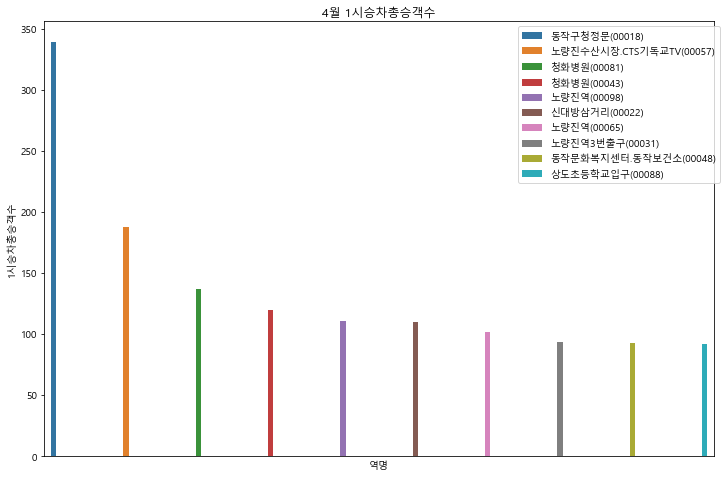

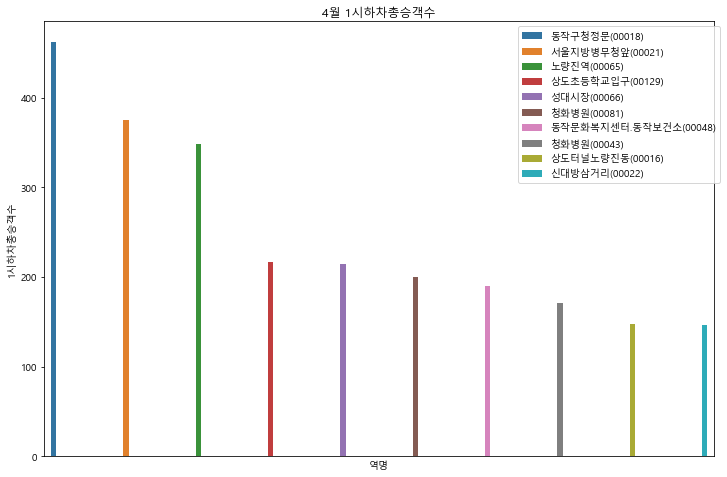

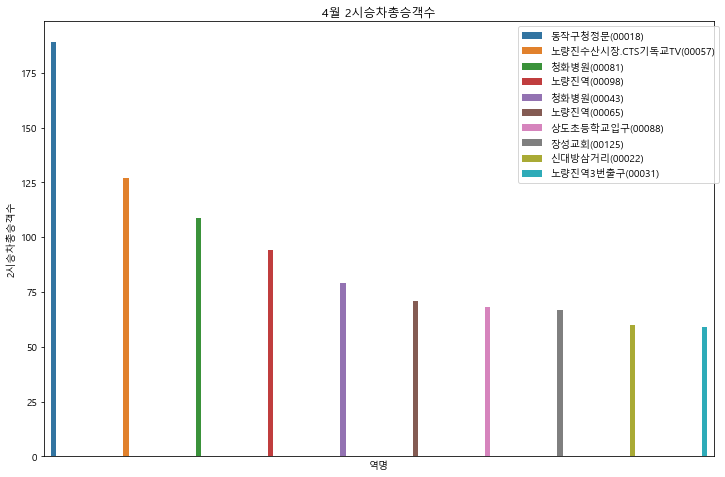

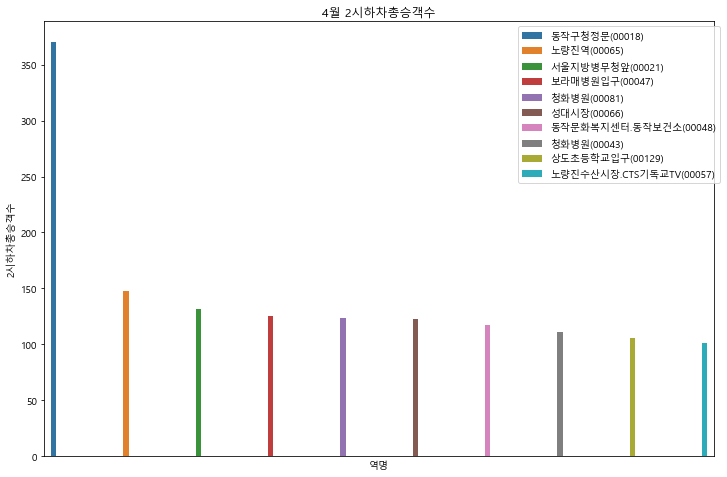

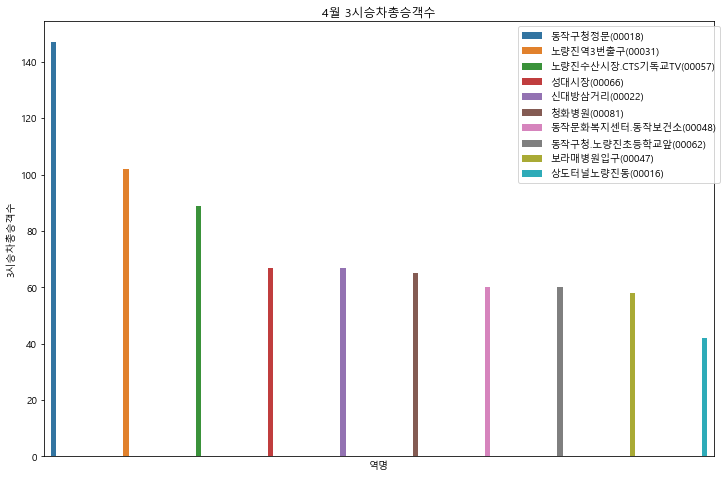

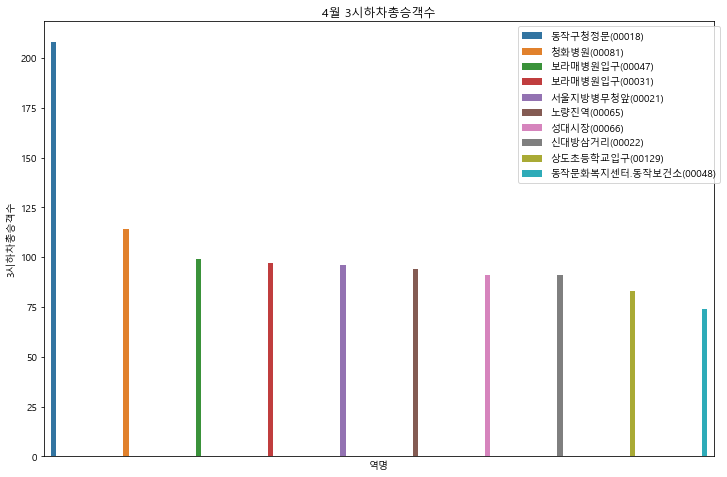

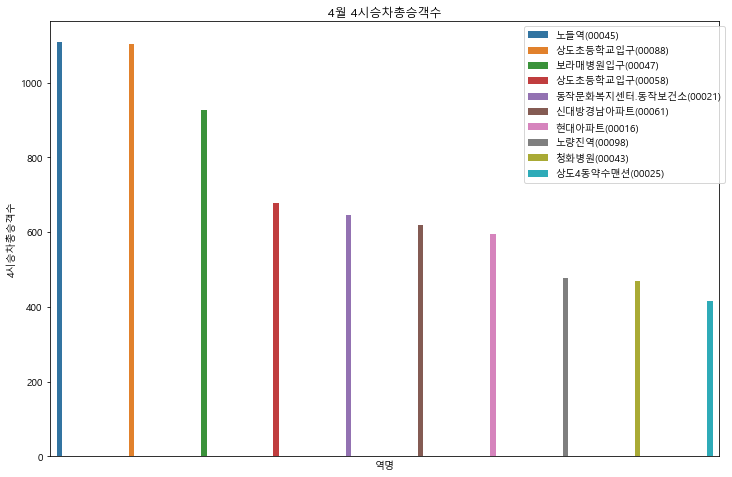

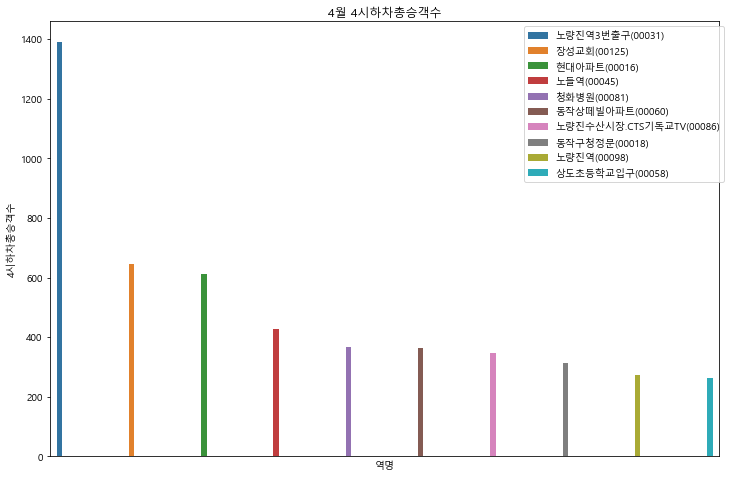

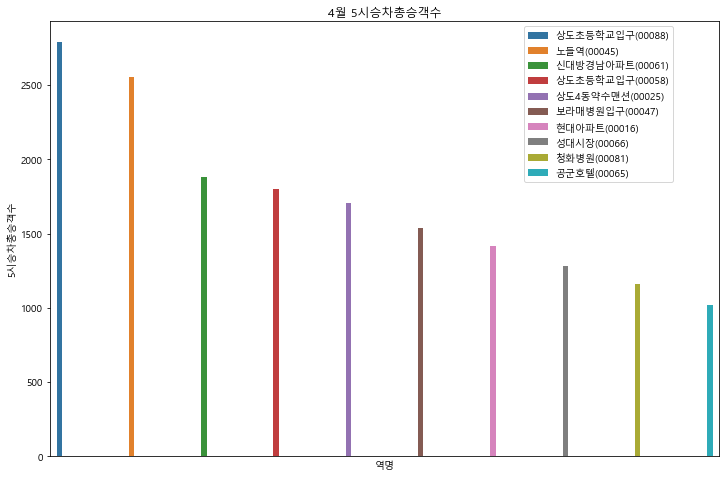

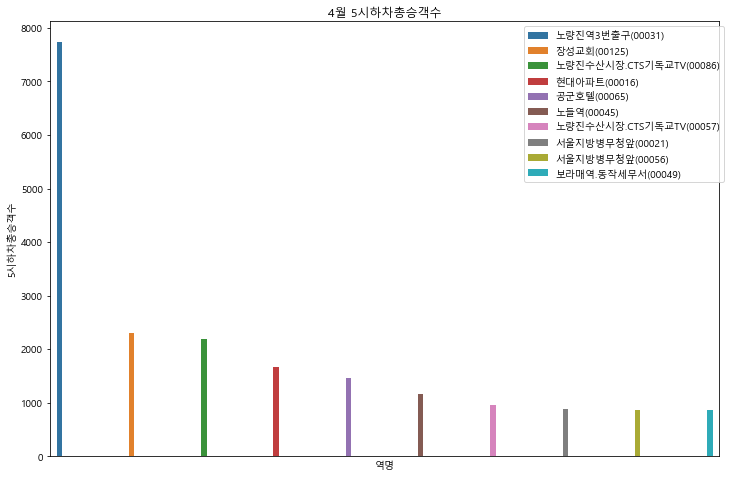

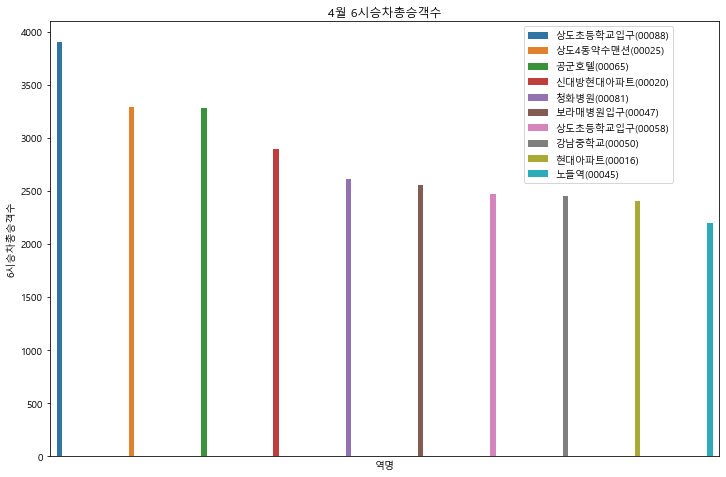

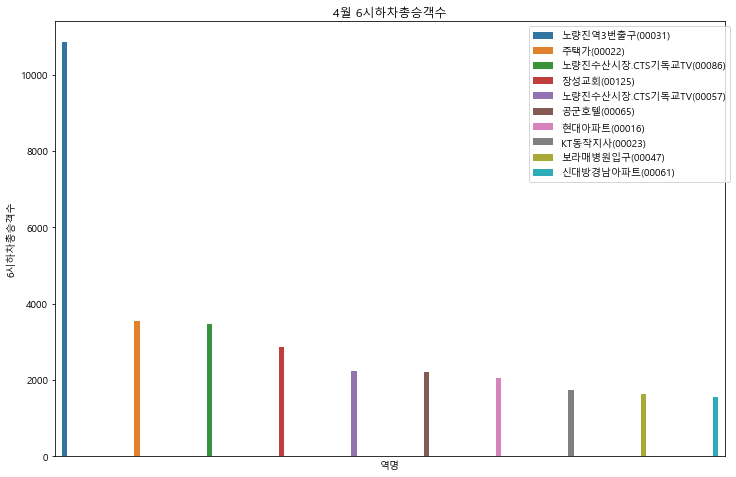

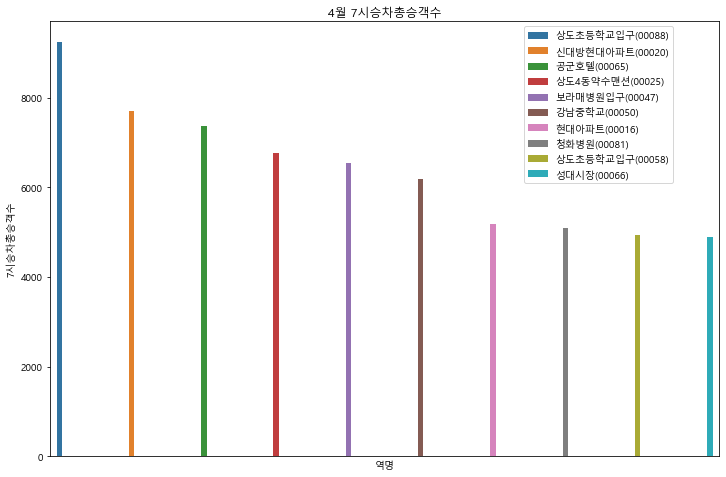

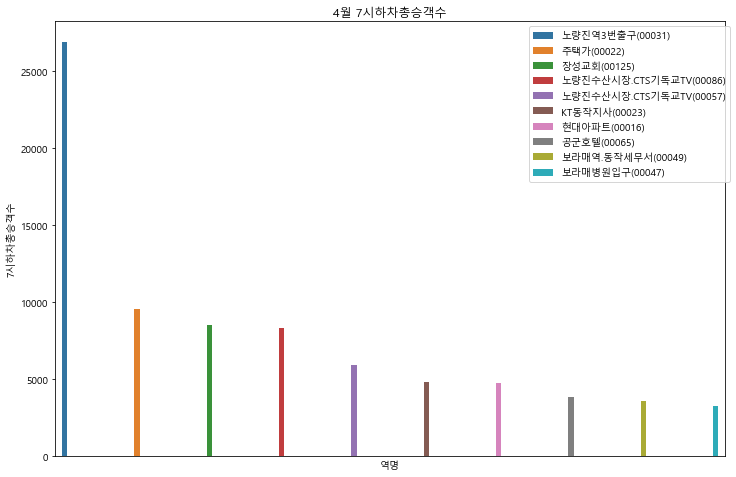

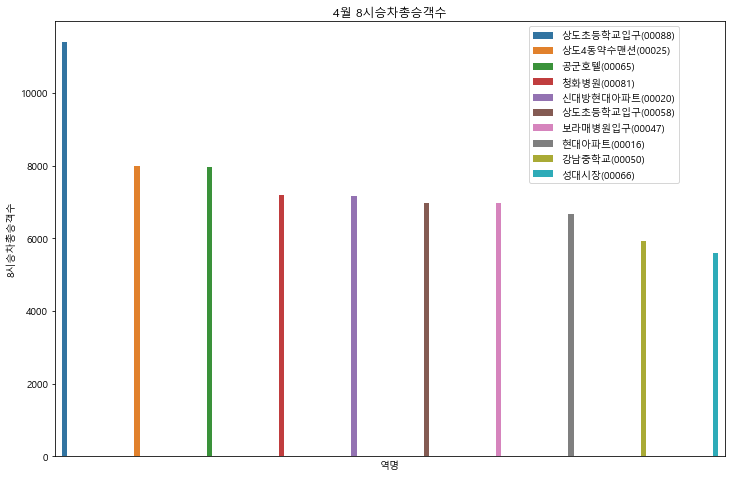

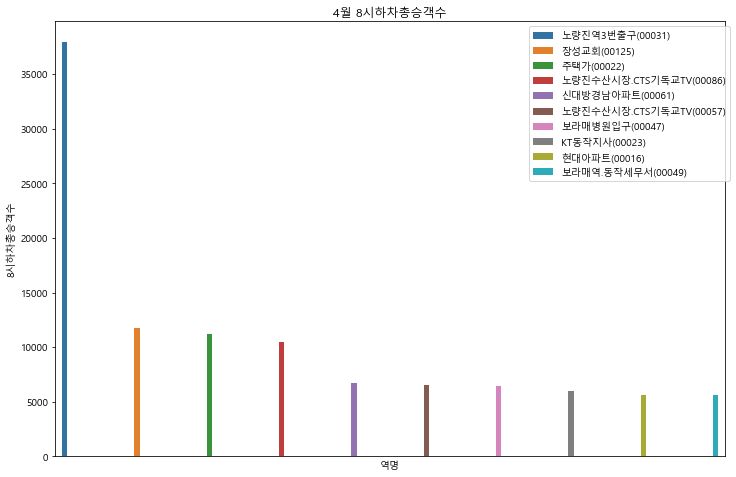

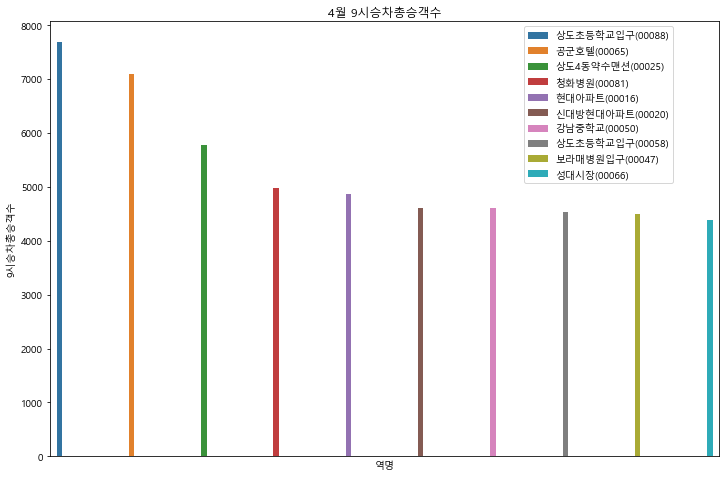

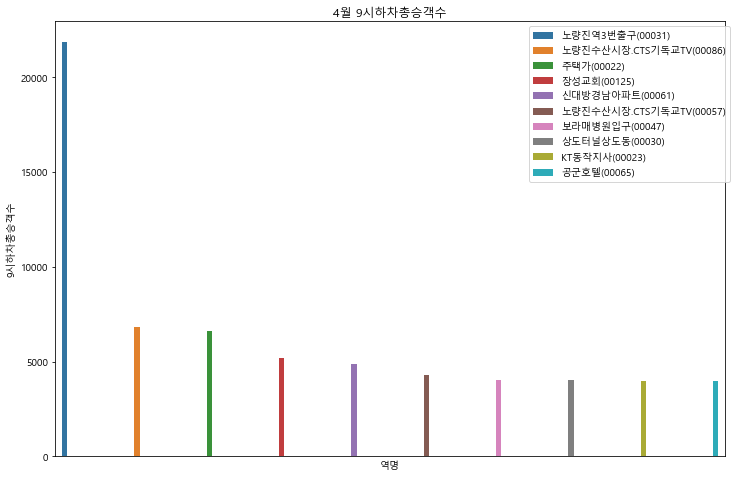

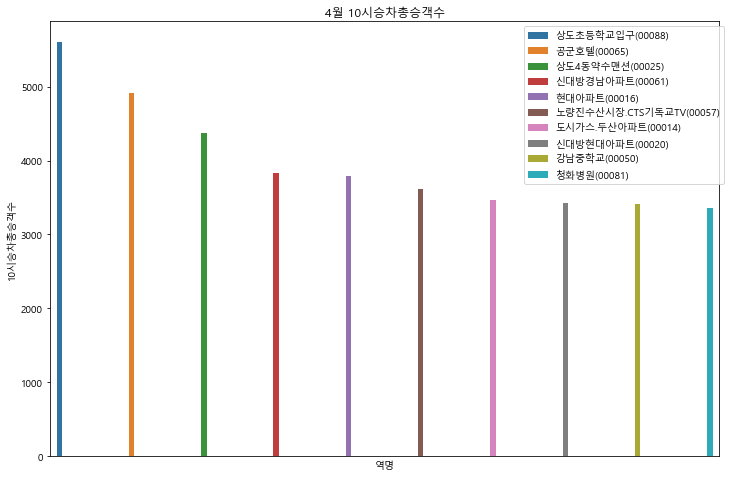

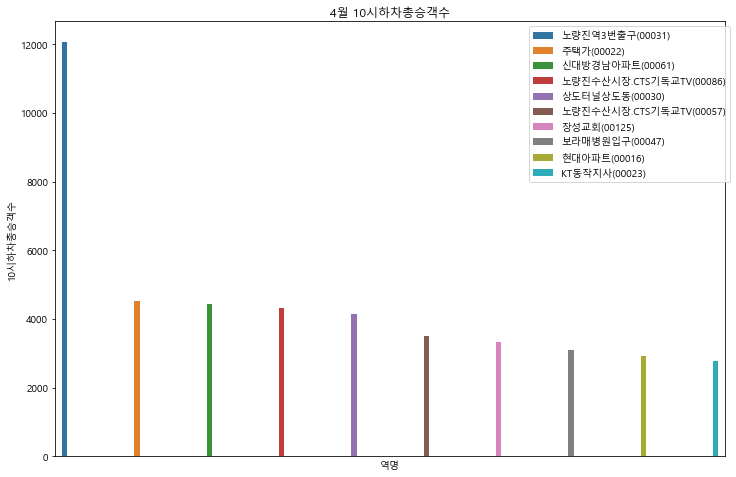

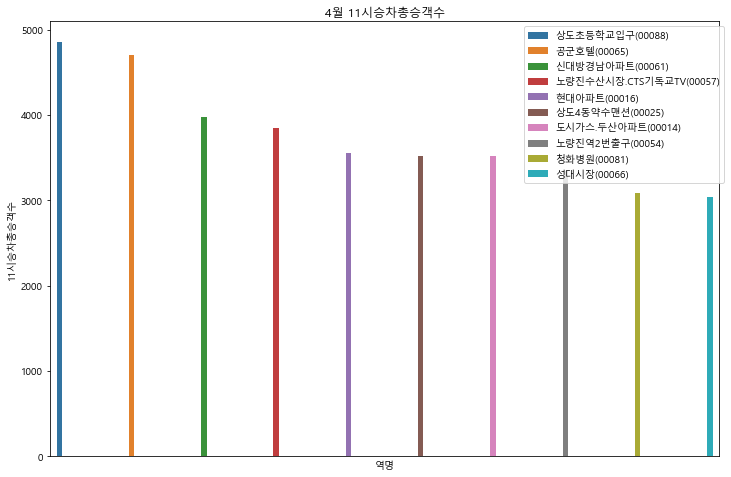

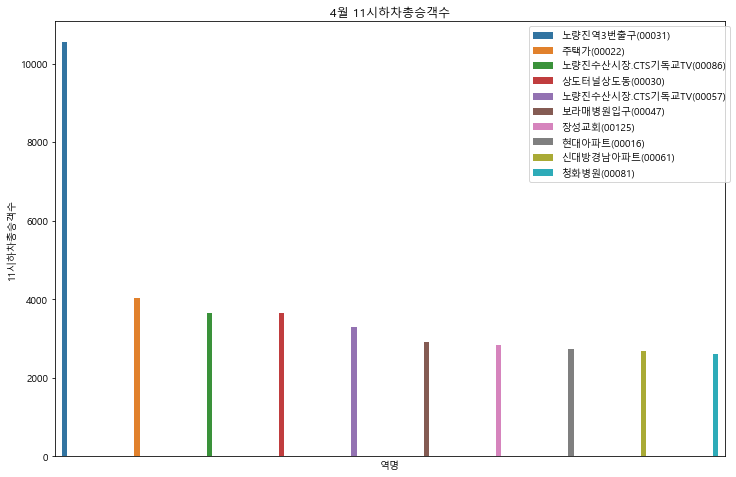

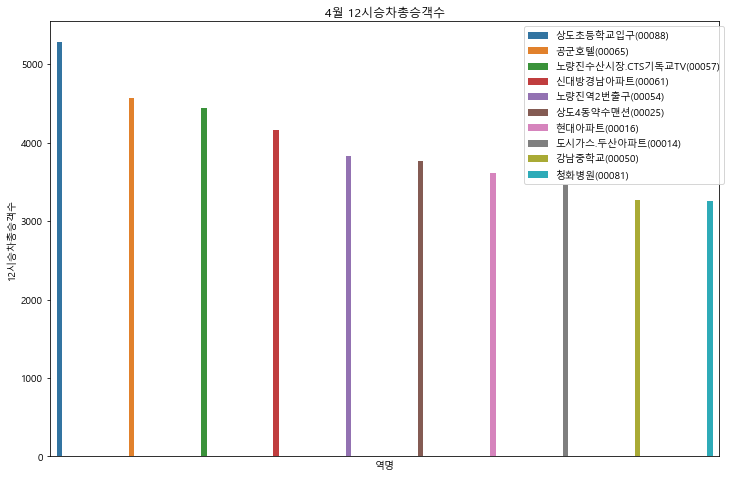

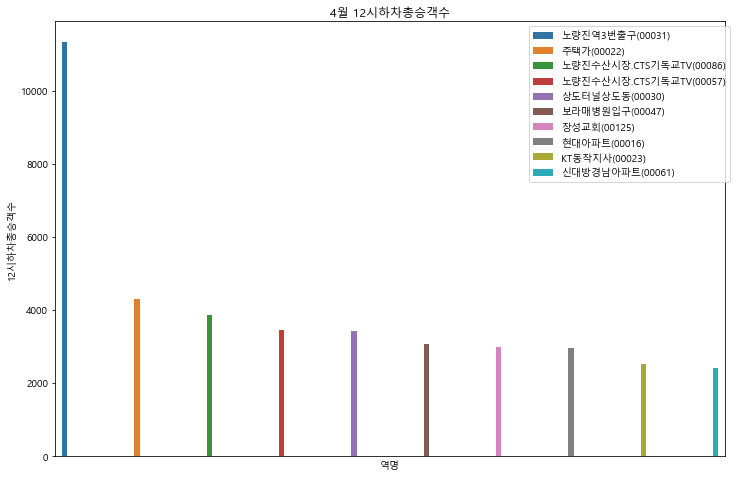

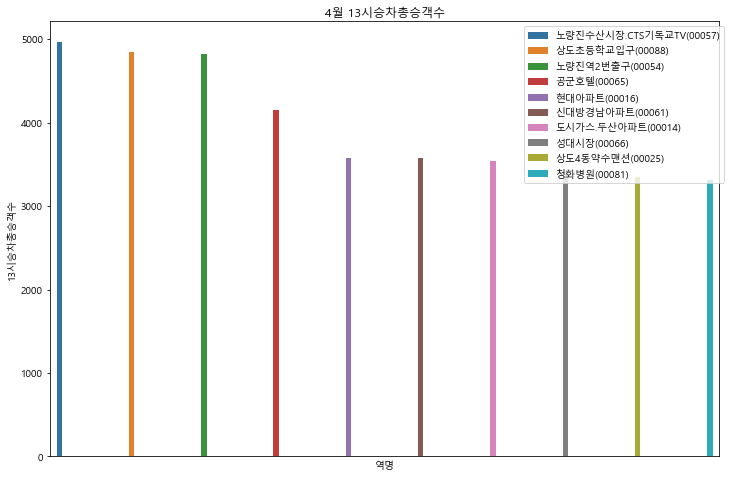

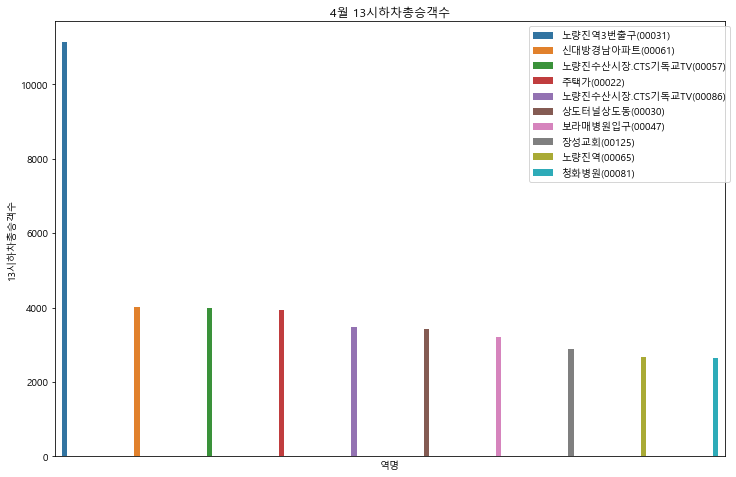

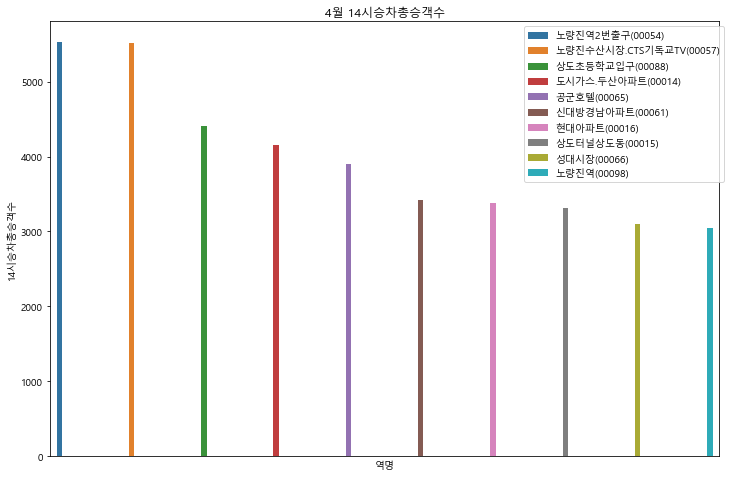

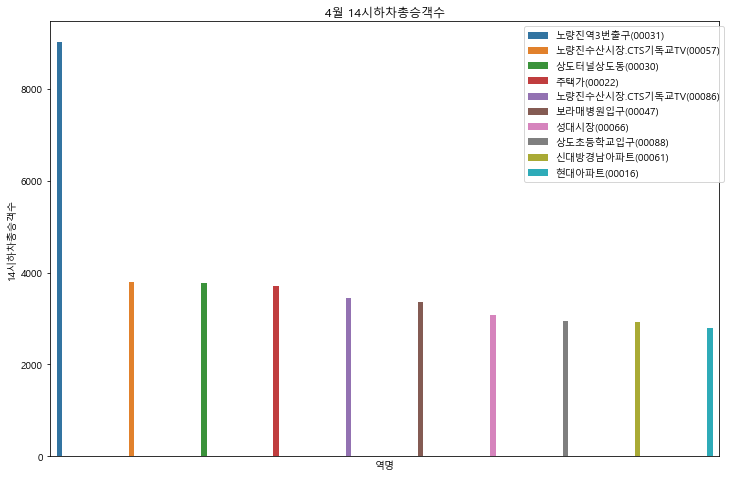

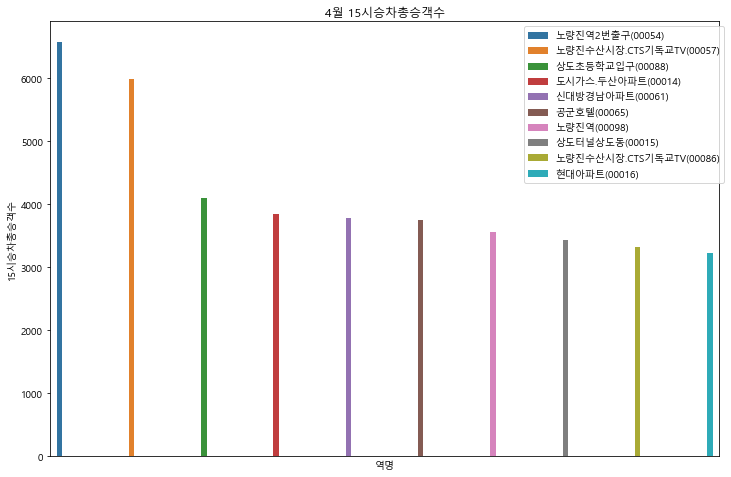

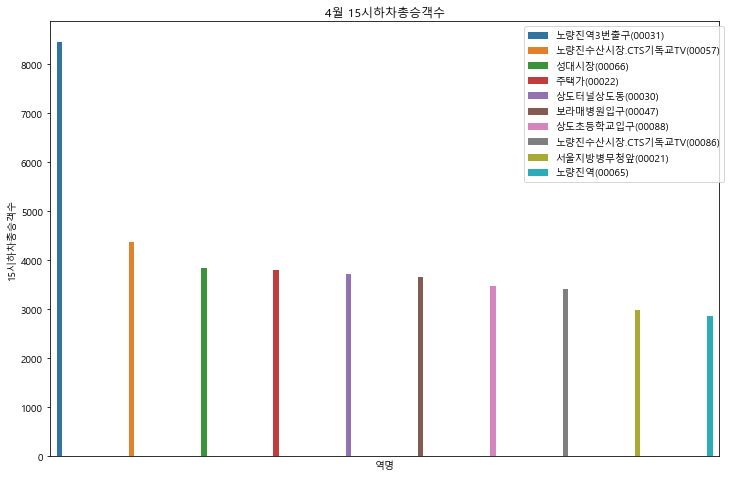

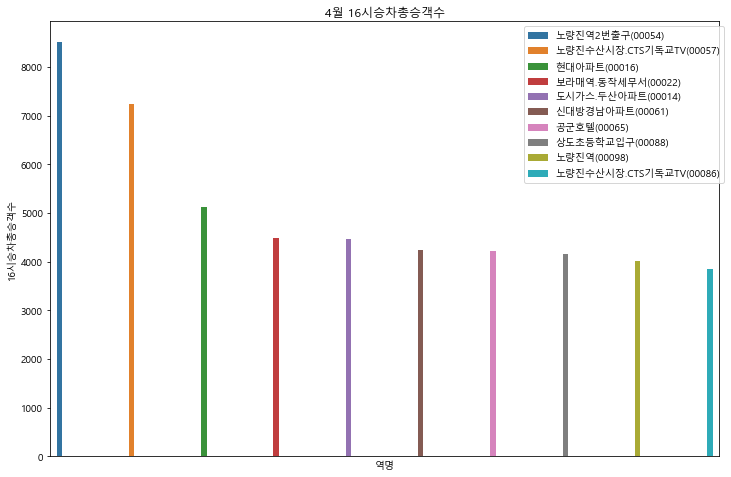

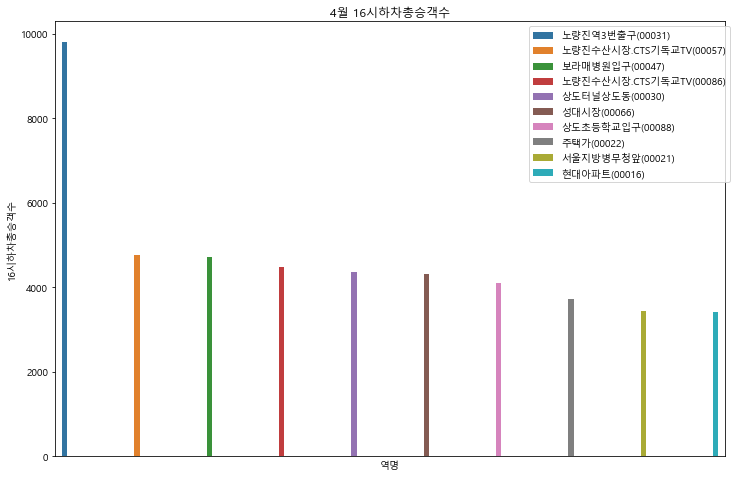

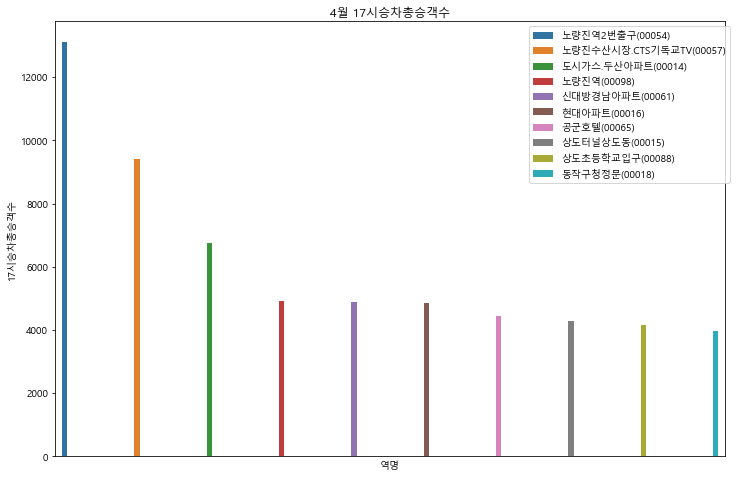

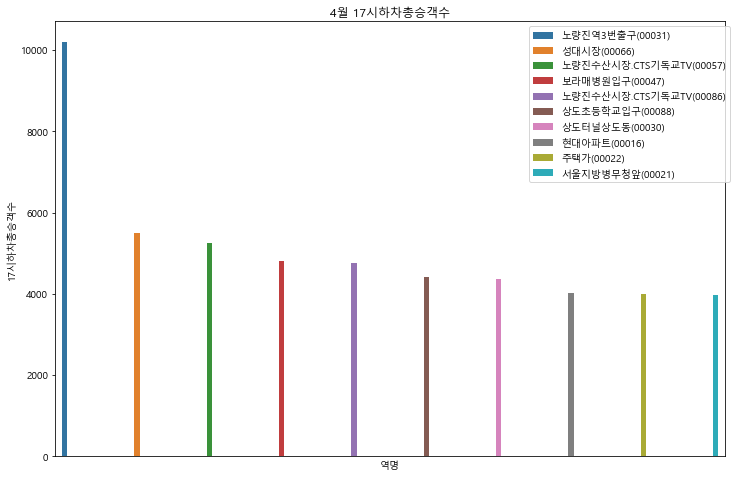

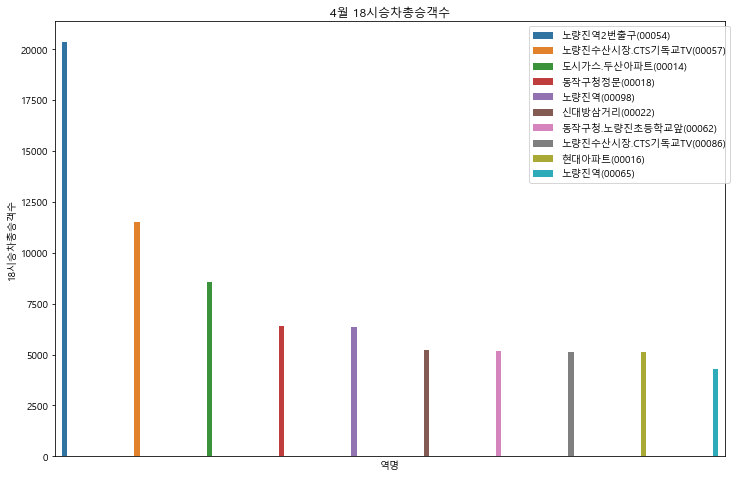

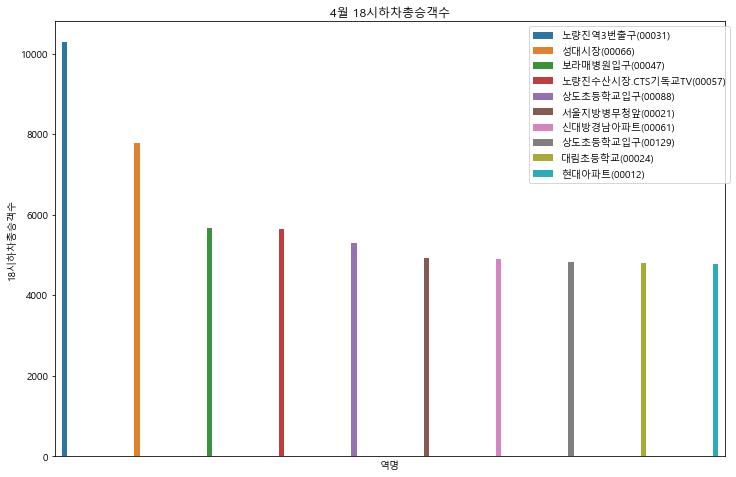

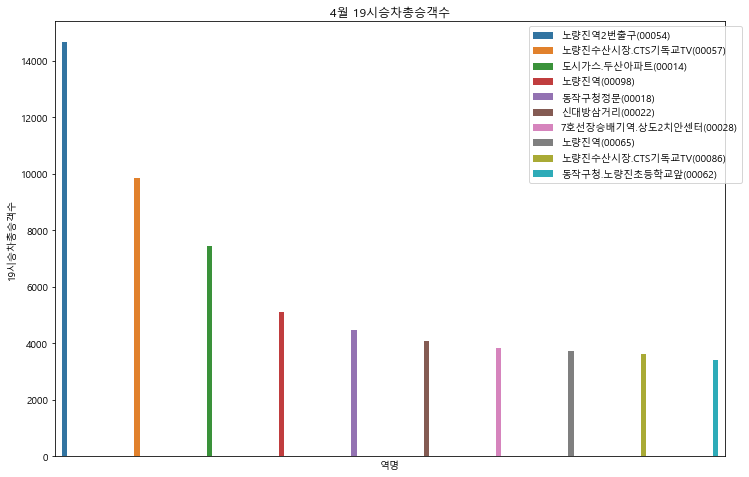

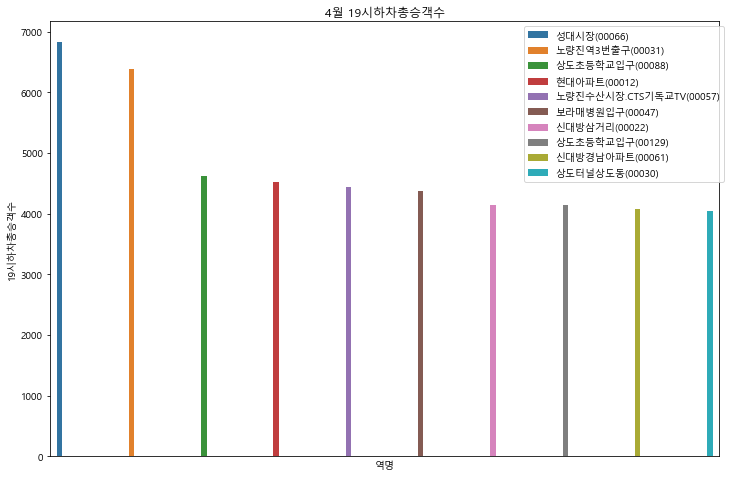

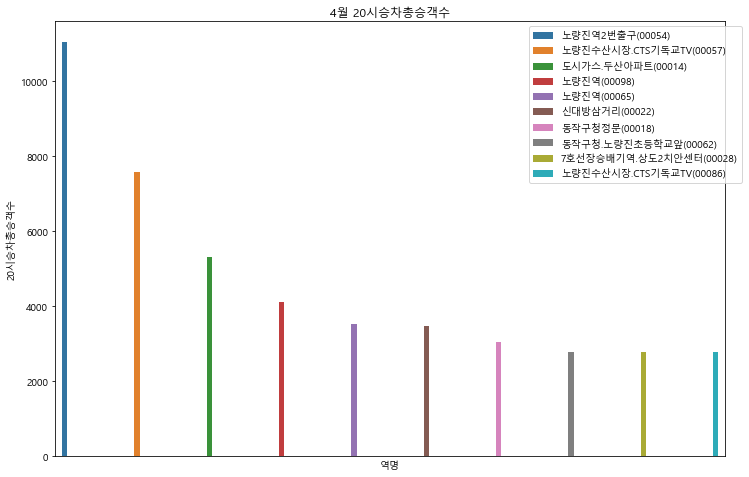

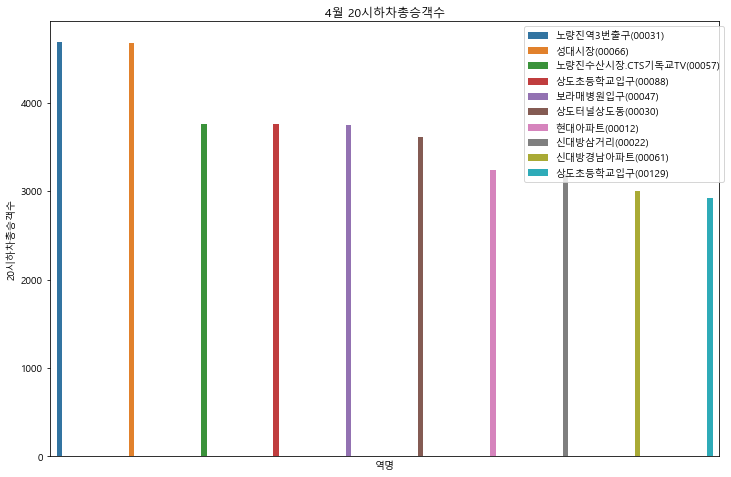

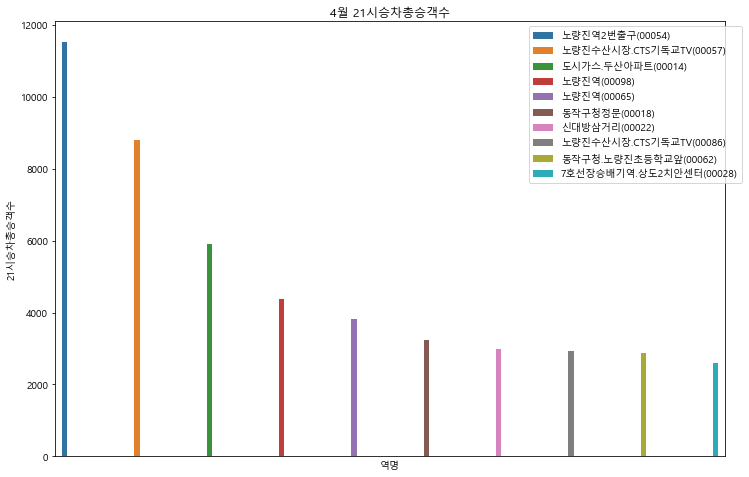

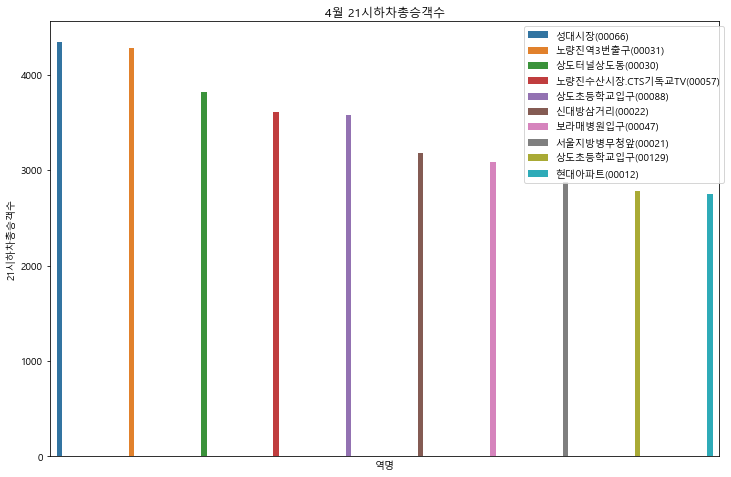

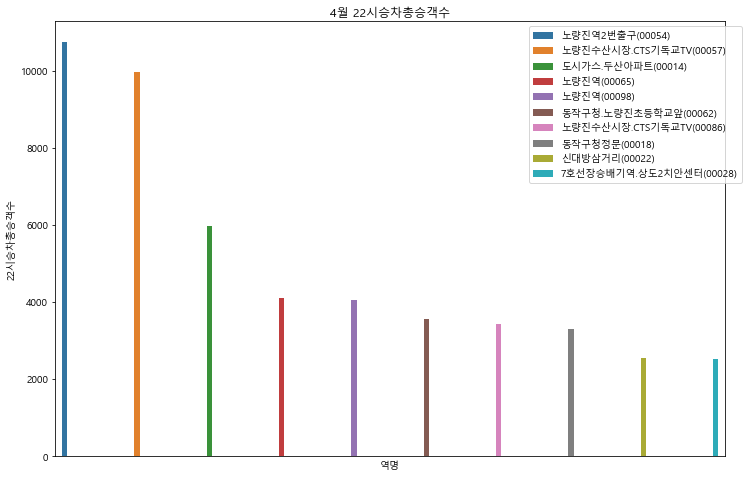

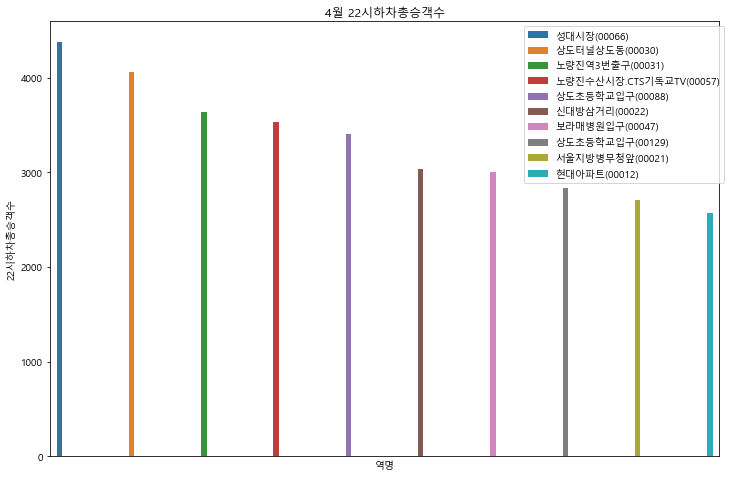

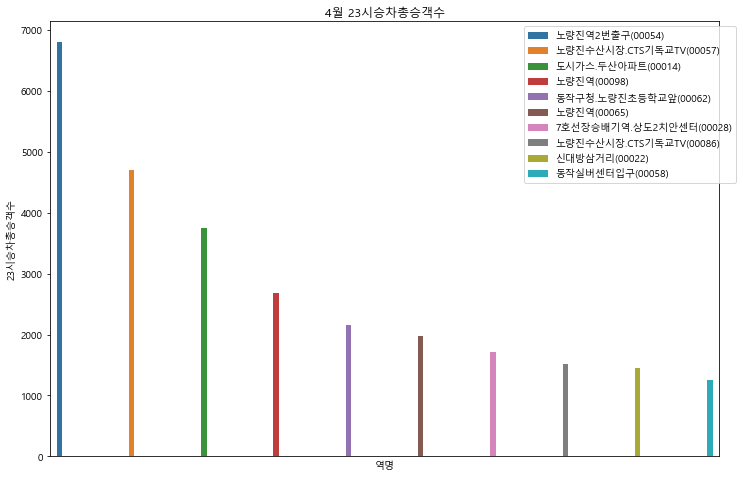

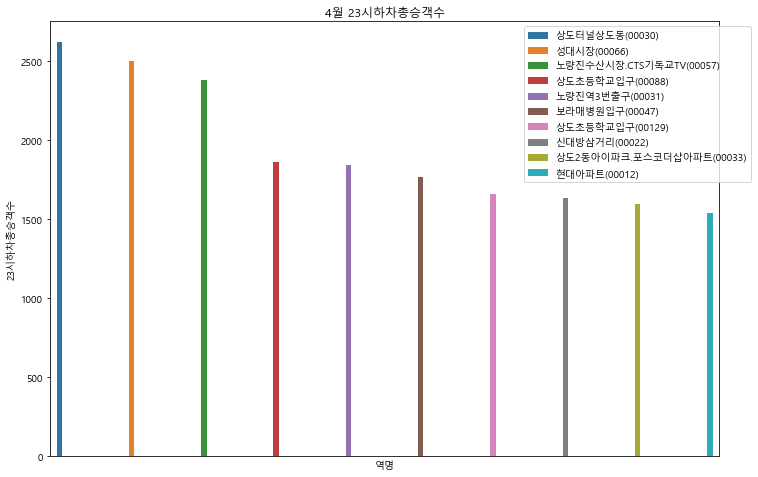

In [206]:
for i in columns:
    # 바플롯 그리기
    plt.figure(figsize=(12, 8))
    sns.barplot(x='역명', y=i, data=result_dict[i], hue='역명')
    plt.title('4월 ' + i)
    plt.xlabel('역명')
    plt.xticks([])
    plt.legend(loc='upper left', bbox_to_anchor=(0.70, 1))
    plt.ylabel(i)
    plt.show()

In [129]:
location_sum = df_sub

In [123]:
#location_sum = df.groupby('정류소명')[['X좌표', 'Y좌표']].mean().reset_index()

In [130]:
location_sum[location_sum['정류소명'] == '서울교(가상)']

,NODE_ID,ARS_ID,정류소명,X좌표,Y좌표,정류소타입,포함불포함
432,118000581,20991,서울교(가상),126.915985,37.520345,가상정류장,포함
434,118000582,20920,서울교(가상),126.915185,37.519855,가상정류장,포함


In [131]:
location_sum[location_sum['정류소명'] == '여의교(가상)']

,NODE_ID,ARS_ID,정류소명,X좌표,Y좌표,정류소타입,포함불포함
381,119000310,20993,여의교(가상),126.927915,37.515518,가상정류장,포함
384,119000311,20905,여의교(가상),126.927668,37.514803,가상정류장,포함


In [133]:
location_sum = location_sum.drop([432, 434, 381, 384]).reset_index()

In [134]:
#pip install folium

In [135]:
import folium

# 지도 초기 설정
map_center = [location_sum['Y좌표'].mean(), location_sum['X좌표'].mean()]  # 데이터프레임의 중심을 지도 중심으로 설정
my_map = folium.Map(location=map_center, zoom_start=12)

# 데이터프레임의 각 행에 대해 지도에 점을 찍음
for index, row in location_sum.iterrows():
    folium.Marker(
        location=[row['Y좌표'], row['X좌표']],
        popup=row['정류소명'],  # 마커 클릭 시 표시될 팝업
        icon=folium.Icon(color='blue')  # 마커의 색상 설정
    ).add_to(my_map)

# 지도를 HTML 파일로 저장
my_map.save("map_with_markers.html")